<a href="https://colab.research.google.com/github/naomideutsch/Deep_Prior/blob/master/deep_prior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install tensorflow-gpu==1.15

     |████████████████████████████████| 411.5MB 40kB/s 
     |████████████████████████████████| 3.8MB 46.0MB/s 
     |████████████████████████████████| 512kB 53.6MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=0cebdf2aa4c76de57815d80599fcc7a438845b68f09a9ee24deccc8995e0543b
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorflow-estimator<2.3.0,>=2.2.0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.2.2
    Uninstalling te

In [5]:
!git clone https://github.com/naomideutsch/Deep_Prior

fatal: destination path 'Deep_Prior' already exists and is not an empty directory.


In [6]:
cd Deep_Prior

/content/Deep_Prior


In [62]:
!git pull

remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 4 (delta 2), reused 4 (delta 2), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/naomideutsch/Deep_Prior
   ca1dfad..c3306a7  master     -> origin/master
Updating ca1dfad..c3306a7
Fast-forward
 preprocessing/blur_utils.py | 4 ++--
 1 file changed, 2 insertions(+), 2 deletions(-)


In [ ]:

!python super_resolution.py --lr-imgs-dir="dataset/lr_stylegan" --hr-imgs-dir="dataset/hr_stylegan" --latents-dir="dataset/latents_dir" --hr-img-size 256 256

In [ ]:
from PIL import Image
import os
import numpy as np
import tensorflow as tf
from preprocessing import blur_utils
DIR = "dataset/hr_stylegan"
ORIG = "dataset/lr_stylegan"

images_names = os.listdir(DIR)
for name in images_names:
    img = Image.open(os.path.join(DIR, name))
    display(img)
    orig = Image.open(os.path.join(ORIG, name))
    display(orig)

Preprocessing blurred images

In [67]:
!python preprocessing/blur_preprocessing.py --img-dir="dataset/lr_stylegan" --output-dir="dataset/x_motion_blurred" --kernel-size=5 --sigma=2 --kernel-type="x_motion"

[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]

2020-06-25 13:48:04.280540: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-06-25 13:48:04.293249: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-06-25 13:48:04.293776: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla P100-PCIE-16GB major: 6 minor: 0 memoryClockRate(GHz): 1.3285
pciBusID: 0000:00:04.0
2020-06-25 13:48:04.294051: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2020-06-25 13:48:04.295307: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2020-06-25 13:48:04.296320: I tensorflow

In [ ]:
!python preprocessing/blur_preprocessing.py --img-dir="dataset/lr_stylegan" --output-dir="dataset/blurred" --kernel-size=3 --sigma=2 --kernel-type="gauss"

In [43]:
from preprocessing import blur_utils

kernel = blur_utils.get_kernel(5, 2)
print(kernel())


Tensor("ExpandDims_3:0", shape=(5, 5, 3, 1), dtype=float32)


In [113]:
!rm -r dataset/blurred

Display blurred images

(128, 128)


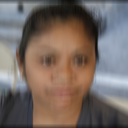

(128, 128)


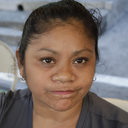

In [66]:
from PIL import Image
import os
import numpy as np
import tensorflow as tf
from preprocessing import blur_utils
DIR = "dataset/x_motion_blurred"
ORIG = "dataset/lr_stylegan"
images_names = os.listdir(DIR)
for name in images_names:
    img = Image.open(os.path.join(DIR, name))
    print(img.size)
    display(img)
    orig = Image.open(os.path.join(ORIG, name))
    print(orig.size)

    display(orig)

In [22]:
!git pull

remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 4 (delta 3), reused 4 (delta 3), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/naomideutsch/Deep_Prior
   9abcfb6..4335770  master     -> origin/master
Updating 9abcfb6..4335770
Fast-forward
 preprocessing/blur_preprocessing.py | 1 +
 1 file changed, 1 insertion(+)


In [3]:
cd Deep_Prior/

/content/Deep_Prior


In [118]:
!rm -r dataset/deblurred

In [68]:
!python deblurring.py --blurred-imgs-dir="dataset/x_motion_blurred" --deblurred-imgs-dir="dataset/x_motion_deblurred01" --latents-dir="dataset/x_motion_latents_dir_3_2" --kernel-size=3 --sigma=2 --beta=0.1 --reg="grad"




Using TensorFlow backend.










Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



00002.png: 100% 1000/1000 [01:48<00:00,  9.19it/s, loss=50.75]


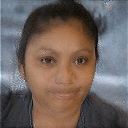

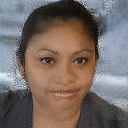

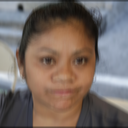

In [69]:
from PIL import Image
import os
import numpy as np
import tensorflow as tf
from preprocessing import blur_utils
DIR0 = "dataset/deblurred0"
DIR01 = "dataset/x_motion_deblurred01"


DIR = "dataset/deblurred"
ORIG = "dataset/x_motion_blurred"
images_names = os.listdir(DIR)
for name in images_names:
    img = Image.open(os.path.join(DIR01, name))
    display(img)
    img = Image.open(os.path.join(DIR0, name))
    display(img)
    orig = Image.open(os.path.join(ORIG, name))

    display(orig)